# Setting up a basic workstation; import pandas, seaborn, matplot, fractions

In [3]:
import matplotlib.pyplot as plt
import seaborn as snsimport numpy as np
import pandas as pd
from fractions import Fraction as ft

original_df = pd.read_csv("rt.reviews.tsv",encoding='windows-1254',delimiter = '\t')
df = original_df.copy()
original_df2 = pd.read_csv('rt.movie_info.tsv',encoding='windows-1254',delimiter = '\t')
df2 = original_df2.copy()

## Define two functions that will help with cleaning up data

In [4]:
def convert(s):
    try:
        return float(s)
    except ValueError:
        num, denom = s.split('/')
        return float(num) / float(denom)

In [5]:
def isFloat(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [6]:
merged_df = df.merge(df2,on='id').copy()

In [7]:
merged_df.rating_x = merged_df.rating_x.astype(str)

In [8]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'N'].index,inplace=True)

In [9]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'R'].index,inplace=True)

In [10]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'T'].index,inplace=True)

In [11]:
merged_df.rating_x.drop(merged_df[merged_df['rating_x'] == '1-5'].index, inplace = True)

In [12]:
merged_df.rating_x.replace(to_replace = '3 1/2', value = 3.5, inplace = True)

In [13]:
merged_df.rating_x.replace(to_replace = 'F-', value = 0, inplace = True)

In [14]:
for x in merged_df.rating_x:
    try:
        merged_df.rating_x.replace(x,convert(x),inplace=True)
    except ValueError:
        pass

In [15]:
merged_df['rating_x'] = merged_df.rating_x.astype(str)

In [17]:
letter_grades = []
for x in merged_df.rating_x:
    if not(isFloat(x)):
        letter_grades.append(x)

In [18]:
set(letter_grades)

{'A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'F', 'F+'}

In [19]:
for x in merged_df.rating_x:
    for y in letter_grades:
        if x == y:
            if x == 'A':
                merged_df.rating_x.replace(to_replace='A',value=9,inplace=True)
            elif x == 'A+':
                merged_df.rating_x.replace(to_replace='A+',value=10,inplace=True)
            elif x == 'A-':
                merged_df.rating_x.replace(to_replace='A-',value=8.5,inplace=True)
            elif x =='B+':
                merged_df.rating_x.replace(to_replace='B+',value=8,inplace=True)
            elif x == 'B':
                merged_df.rating_x.replace(to_replace='B',value=7,inplace=True)
            elif x == 'B-':
                merged_df.rating_x.replace(to_replace='B-',value=6.5,inplace=True)
            elif x == 'C+':
                merged_df.rating_x.replace(to_replace='C+',value=6,inplace=True)    
            elif x == 'C':
                merged_df.rating_x.replace(to_replace='C',value=5,inplace=True)
            elif x == 'C-':
                merged_df.rating_x.replace(to_replace='C-',value=4.5,inplace=True)
            elif x == 'D+':
                merged_df.rating_x.replace(to_replace='D+',value=4,inplace=True)
            elif x == 'D':
                merged_df.rating_x.replace(to_replace='D',value=3,inplace=True)
            elif x == 'D-':
                merged_df.rating_x.replace(to_replace='D-',value=2.5,inplace=True)
            elif x == 'F+':
                merged_df.rating_x.replace(to_replace='F+',value=2,inplace=True)
            elif x == 'F':
                merged_df.rating_x.replace(to_replace='F',value=1,inplace=True)

In [20]:
merged_df = merged_df[pd.notnull(merged_df['rating_x'])]

In [21]:
merged_df.rating_x = merged_df['rating_x'].astype('float64')

In [22]:
merged_df_box = merged_df.copy()

In [23]:
merged_df_box.dropna(subset=['box_office'], inplace=True)

In [24]:
group_id_mean = merged_df_box.groupby('id').mean()

In [25]:
group_id_max = merged_df_box.groupby('id').max()

In [98]:
group_id_max

,rating_x,fresh,top_critic,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,,,,
3,8.5,rotten,1,"September 7, 2012","New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
10,8.0,rotten,1,"September 13, 2002",Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
13,8.0,rotten,1,"September 27, 2006","Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
14,7.0,rotten,1,"October 12, 2010","""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904,117 minutes,NaN
23,10.0,rotten,1,"September 6, 2017",A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,99165609,129 minutes,Sony Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,9.8,rotten,1,"September 27, 2017","Embrace of the Serpent features the encounter,...",NR,Action and Adventure,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005,123 minutes,Buffalo Films
1980,10.0,rotten,1,"September 8, 2005",A band of renegades on the run in outer space ...,PG-13,Action and Adventure,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935,119 minutes,Universal Pictures
1981,0.6,rotten,1,"October 5, 2012","Money, Fame and the Knowledge of English. In I...",NR,Comedy,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189,129 minutes,Eros Entertainment


In [26]:
group_id_max.genre.value_counts()

Drama                                                                41
Comedy                                                               36
Comedy|Drama                                                         23
Drama|Mystery and Suspense                                           12
Comedy|Drama|Romance                                                 11
                                                                     ..
Action and Adventure|Animation|Comedy|Science Fiction and Fantasy     1
Action and Adventure|Comedy                                           1
Comedy|Mystery and Suspense                                           1
Art House and International|Documentary                               1
Action and Adventure|Animation|Kids and Family                        1
Name: genre, Length: 89, dtype: int64

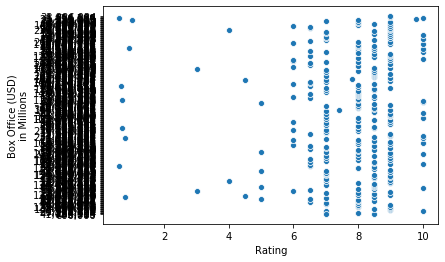

In [59]:
ax = sns.scatterplot(group_id_max.rating_x,group_id_max.box_office, data=group_id_max);
plt.xlabel('Rating')
plt.ylabel('Box Office (USD)\nin Millions');

In [72]:
group_id_max.box_office = group_id_max.box_office.str.replace(',','')

In [75]:
group_id_max.box_office = group_id_max.box_office.astype('int64')

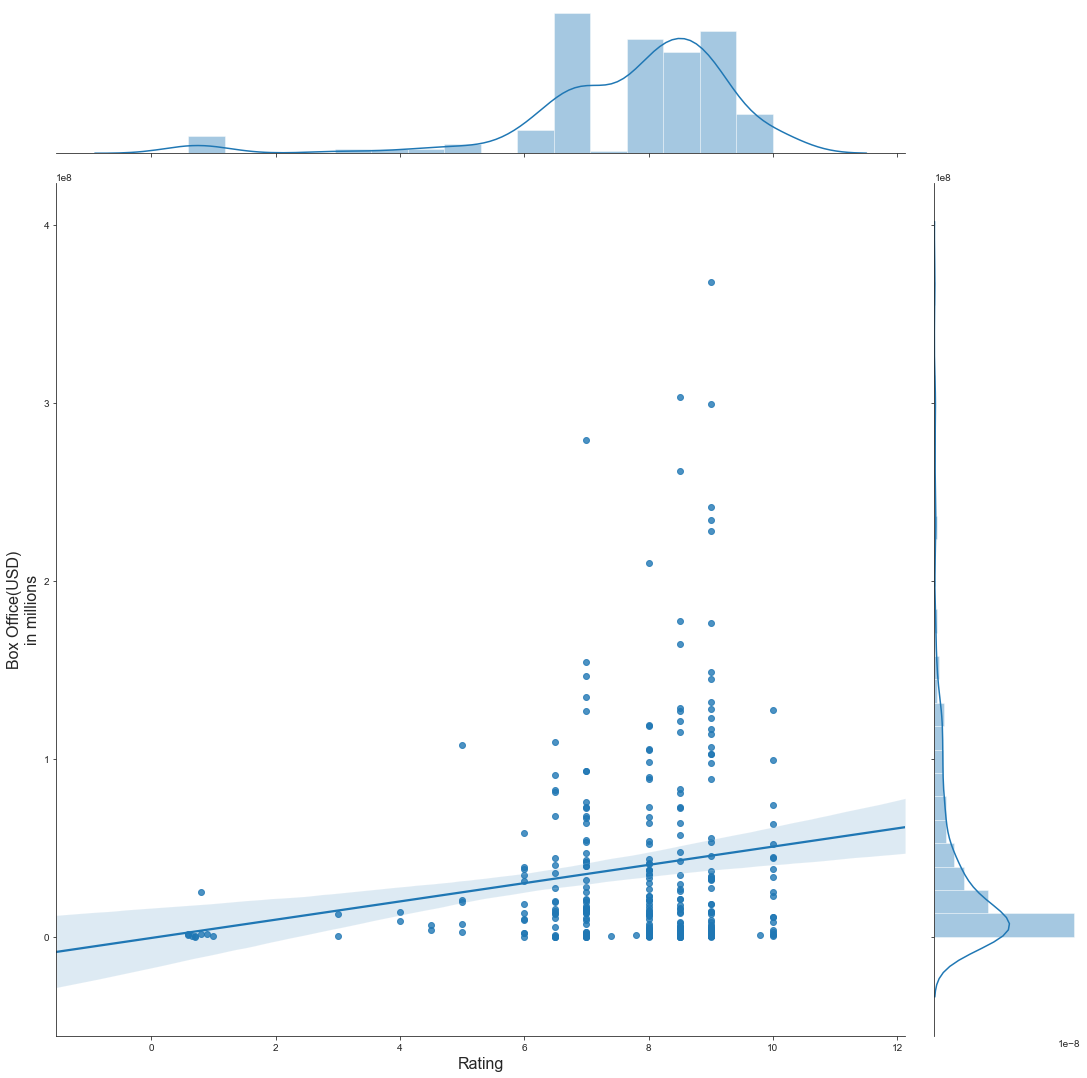

In [125]:
jointplot_rating_box = sns.jointplot(group_id_max.rating_x, group_id_max.box_office, data=group_id_max, kind='reg',height=15)
jointplot_rating_box.set_axis_labels('Rating', 'Box Office(USD)\nin millions', fontsize=16);

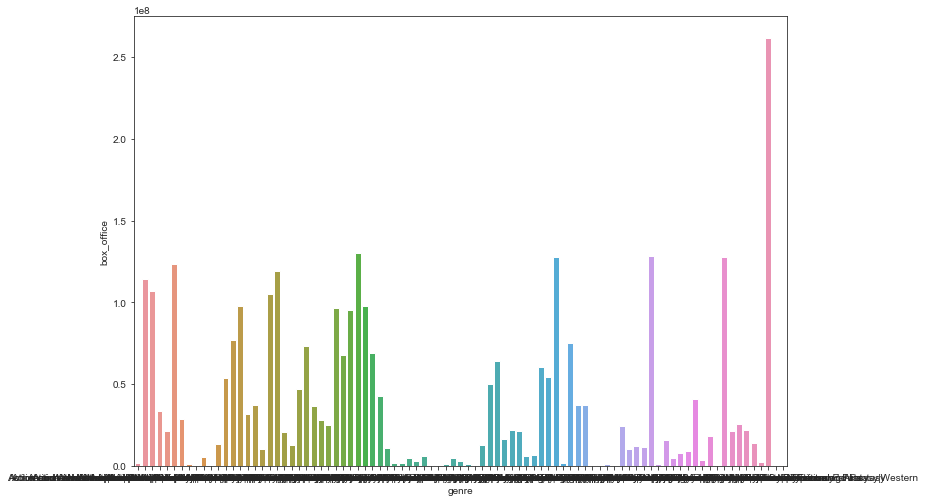

In [77]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=group_id_max.groupby('genre').mean().index,
                               y=group_id_max.groupby('genre')['box_office'].mean(),
                              ax=ax);  

In [78]:
group_id_max.groupby('genre')['box_office'].mean()

genre
Action and Adventure                                                   1526248.0
Action and Adventure|Animation|Comedy                                114053579.0
Action and Adventure|Animation|Comedy|Drama|Kids and Family          106604314.0
Action and Adventure|Animation|Comedy|Kids and Family                 33636018.5
Action and Adventure|Animation|Comedy|Science Fiction and Fantasy     21379315.0
                                                                        ...     
Horror|Mystery and Suspense|Science Fiction and Fantasy               14149065.5
Kids and Family|Musical and Performing Arts                            2027042.0
Kids and Family|Science Fiction and Fantasy                          261835892.0
Mystery and Suspense                                                    262586.0
Mystery and Suspense|Science Fiction and Fantasy|Western                709133.0
Name: box_office, Length: 89, dtype: float64

In [79]:
group_id_max[group_id_max['genre'] == 'Kids and Family|Science Fiction and Fantasy']

,rating_x,fresh,top_critic,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,,,,
1442,8.5,rotten,1,"September 30, 2005",Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892,161 minutes,Warner Bros. Pictures


In [80]:
for x in group_id_max.genre:
    if x.startswith('Action and Adventure'):
        group_id_max.genre.replace(to_replace=x,value='Action and Adventure',inplace=True)

In [81]:
for x in group_id_max.genre:
    if x.startswith('Drama'):
        group_id_max.genre.replace(to_replace=x,value='Drama',inplace=True)

In [82]:
for x in group_id_max.genre:
    if x.startswith('Comedy'):
        group_id_max.genre.replace(to_replace=x,value='Comedy',inplace=True)

In [83]:
for x in group_id_max.genre:
    if x.startswith('Art House and International'):
        group_id_max.genre.replace(to_replace=x,value='Art House and International',inplace=True)

In [84]:
for x in group_id_max.genre:
    if x.startswith('Horror'):
        group_id_max.genre.replace(to_replace=x,value='Horror',inplace=True)

In [85]:
for x in group_id_max.genre:
    if x.startswith('Animation'):
        group_id_max.genre.replace(to_replace=x,value='Animation',inplace=True)

In [86]:
for x in group_id_max.genre:
    if x.startswith('Documentary'):
        group_id_max.genre.replace(to_replace=x,value='Documentary',inplace=True)

In [87]:
for x in group_id_max.genre:
    if (x.startswith('Mystery')) or (x.startswith('Kids and')) or (x.startswith('Classics')):
        group_id_max.genre.replace(to_replace=x,value='Misc',inplace=True)

In [88]:
merged_df.rating_x.drop(merged_df[merged_df['rating_x'] == '1-5'].index, inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [89]:
group_id_max.genre.drop(group_id_max[group_id_max.genre == 'Misc'].index, inplace=True)

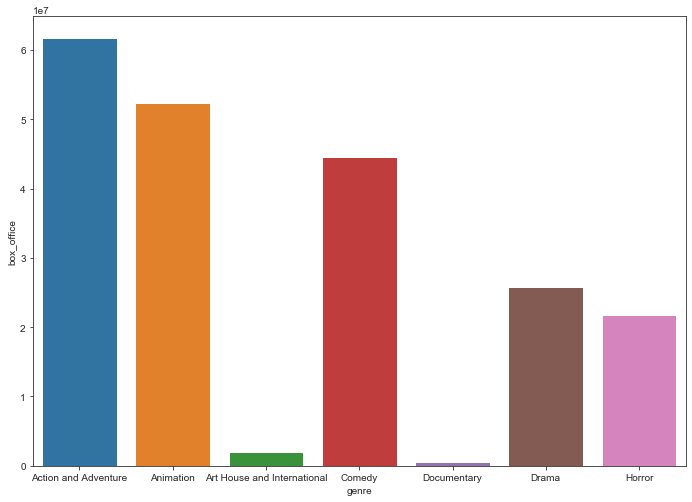

In [91]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=group_id_max.groupby('genre').mean().index,
                               y=group_id_max.groupby('genre')['box_office'].mean(),
                              ax=ax);  

In [110]:
grouped_mean_and_top = group_id_max.merge(group_id_mean,on='id',how='inner')

In [121]:
grouped_mean_and_top.groupby('genre')['rating_x_y'].mean()

genre
Action and Adventure           1.546492
Animation                      1.499855
Art House and International    1.891260
Comedy                         1.521093
Documentary                    1.753313
Drama                          1.669132
Horror                         0.931517
Misc                           1.438336
Name: rating_x_y, dtype: float64

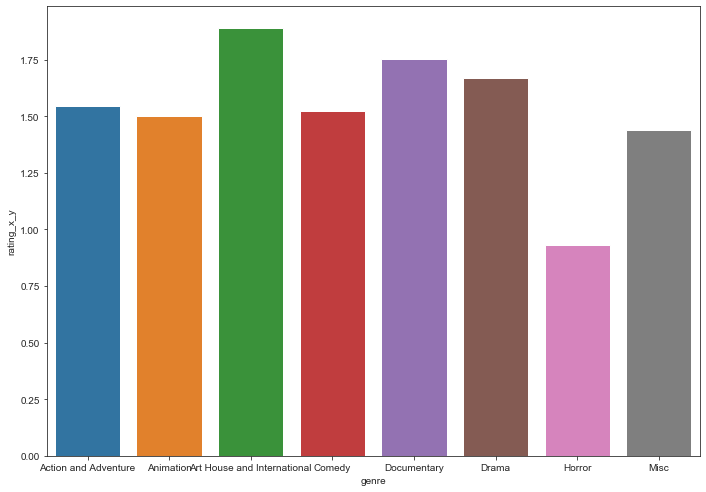

In [122]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=grouped_mean_and_top.groupby('genre').mean().index,
                               y=grouped_mean_and_top.groupby('genre')['rating_x_y'].mean(),
                              ax=ax);  